In [20]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

%matplotlib inline

# Problem 1 (HKT Exercise 2.12)

In [21]:
def deltaU(rho_i, rho_f, M=1.2*c.M_sun):
  return (3/(4*np.pi))**(-1/3) * c.G * M**(5/3) * (rho_f**(1/3) - rho_i**(1/3))

In [22]:
deltaU(1e9*u.g*u.cm**-3, 1e15*u.g*u.cm**-3).cgs

<Quantity 4.53818694e+53 erg>

# Problem 2 (HKT Exercise 2.13)

In [66]:
def Mdot(M, L, gamma_e):
  # return 0.079 * c.G**(-1/2) * (M/c.M_sun)**(-1/2) * (1-gamma_e(M,L))**(-1/2) * (L/c.L_sun/1e6)**(2.07)
  return 6.88e-17 * M**(-1/2) * L**(2.07) * (1-gamma_e(M,L))**(-1/2)
  
def gamma_e_const(*args, **kwargs):
  return 0

def gamma_e_eddington(M, L, kappa=0.3*u.cm**2*u.g**-1):
  val = 7.8e-5 * kappa * L * M**-1 * u.g * u.cm**-2
  return val

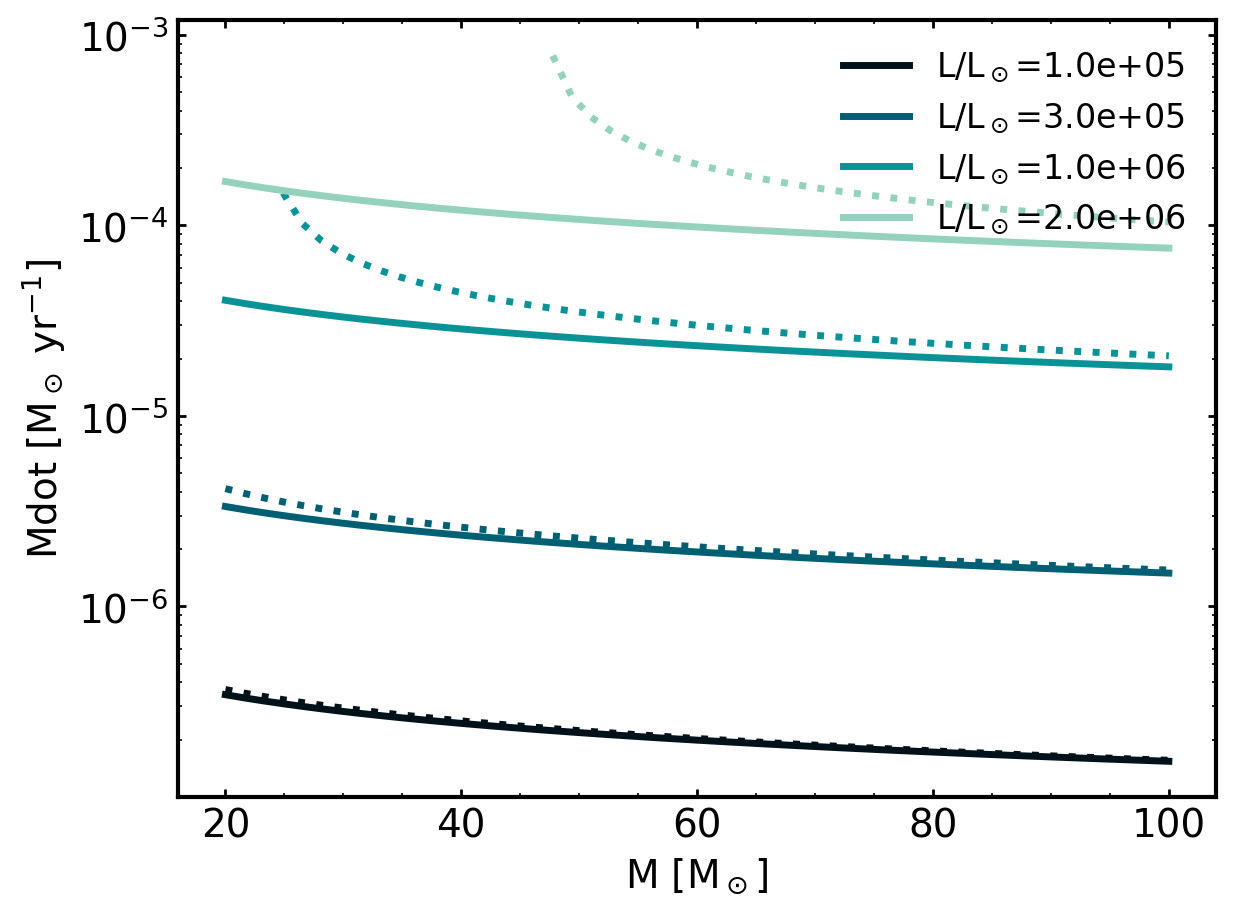

In [70]:
Ms = np.linspace(20, 100) # solar masses
Ls = np.array([1e5, 3e5, 1e6, 2e6]) # solar luminosity

fig, ax = plt.subplots()
for L in Ls:
  y1 = Mdot(Ms, L, gamma_e_const)
  #print(y1.unit)
  lines = ax.plot(Ms, y1, label=r'L/L$_\odot$={:.1e}'.format(L))

  cc = lines[-1].get_color()
  y2 = Mdot(Ms, L, gamma_e_eddington)
  ax.plot(Ms, y2, linestyle=':', color=cc)
  
ax.set_yscale('log')
ax.set_ylabel(r'Mdot [M$_\odot$ yr$^{-1}$]')
ax.set_xlabel(r'M [M$_\odot$]')

ax.legend(fontsize=12, loc='upper right');

fig.savefig('HKT2-13_Fig2-10.png')

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>